In [188]:
import os, cv2
import numpy as np
from os.path import join
from glob import glob
import matplotlib.pyplot as plt
import skimage
import time
import math
from tqdm.notebook import tqdm
from skimage.morphology import skeletonize
from skimage.util import invert
from tqdm import tqdm
import matplotlib.image as mpimg
import json

In [189]:
train_path = 'train_ref'
list_train = sorted(glob(join(train_path, '*.BMP')))
test_path = 'test2'
list_test = sorted(glob(join(test_path, '*.BMP')))
print(len(list_train))
print(len(list_test))

477
1428


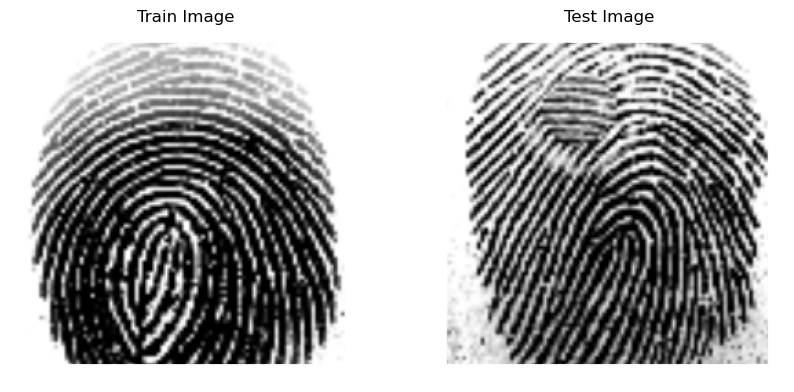

In [190]:
# 이미지 불러오기
first_test2_image_path = list_test2[0]
train_image_1 = mpimg.imread(train_file)
test2_image = mpimg.imread(first_test_image_path)

# 5 16
first_train_image_path = list_train[0]
train_image = mpimg.imread(first_train_image_path)
first_test_image_path = list_test[0]
test_image = mpimg.imread(first_test_image_path)
# 이미지 출력
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(train_image)
axes[0].set_title('Train Image')
axes[0].axis('off')

axes[1].imshow(test_image)
axes[1].set_title('Test Image')
axes[1].axis('off')

plt.show()

In [191]:
def preprocess_image(image_path):
    # 이미지 불러오기 (grayscale로)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    # 이미지 전처리 - 잡음 제거
    image = cv2.medianBlur(image, 3)   
    
    # Adaptive Gaussian Thresholding
    binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # 이미지 반전
    binary_image = cv2.bitwise_not(binary_image)   


    return binary_image

def skeletonize_image(binary_image):   
    # 이미지 반전 (골격화 함수는 검은색 배경에서 흰색 전경을 사용하므로 입력 이미지가 반대로 되어있음)
    inverted_image = invert(binary_image > 0)
    
    # 이미지를 skeletonize (골격화)
    skeleton = skeletonize(inverted_image)

    
    # 결과를 다시 0과 255의 형태로 변환
    skeleton = (skeleton * 255).astype(np.uint8)
    
    return skeleton

Processing train image...


Processing train images: 100%|███████████████████████████████████████████████████████| 477/477 [04:42<00:00,  1.69it/s]


Processing test images...


Processing test images: 100%|██████████████████████████████████████████████████████| 1428/1428 [14:00<00:00,  1.70it/s]


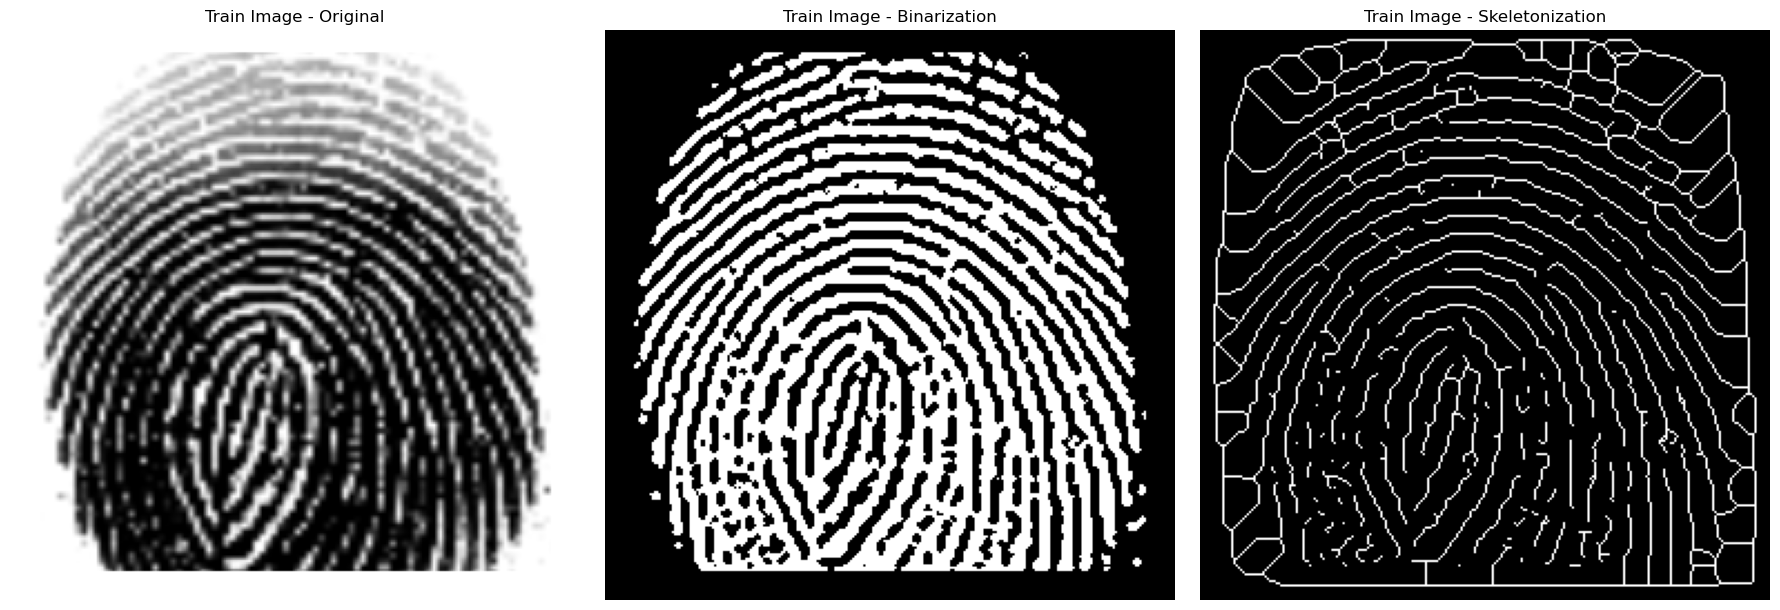

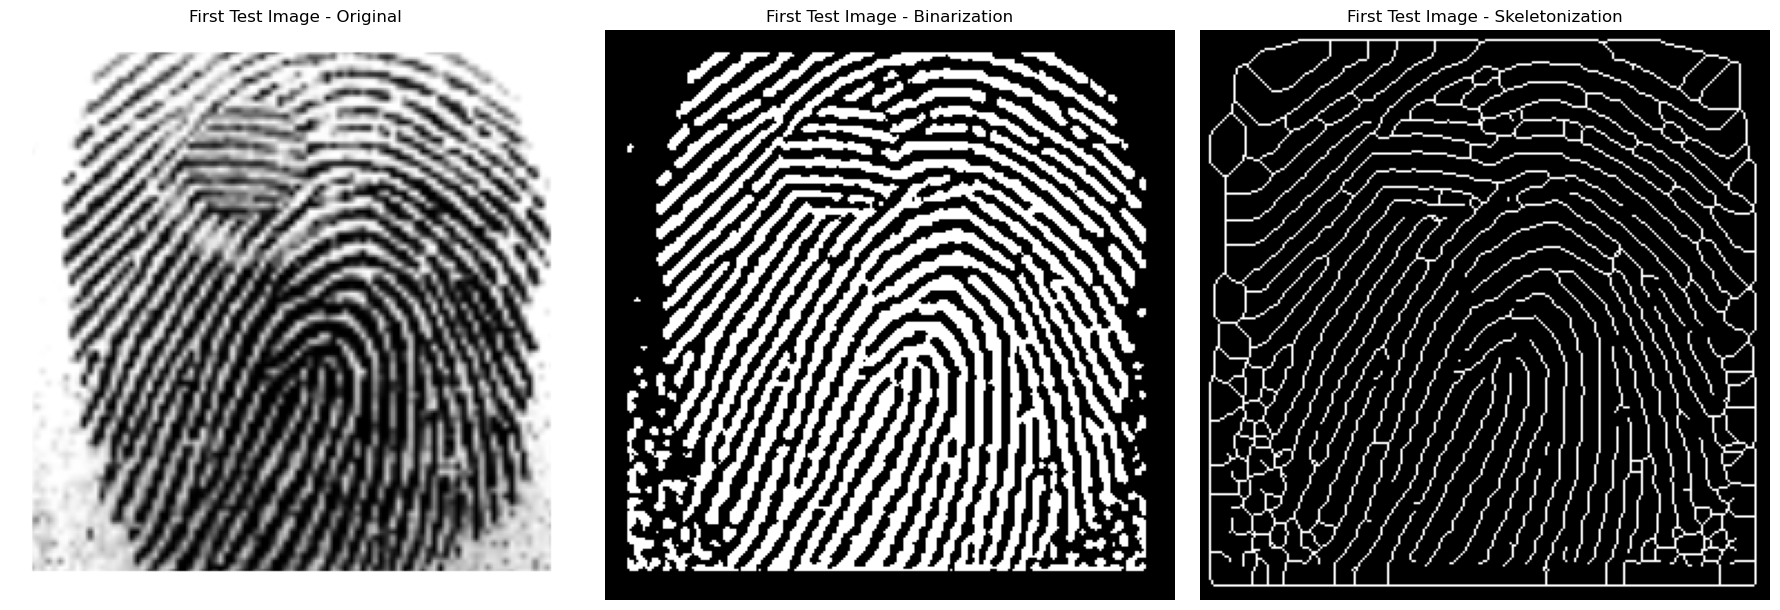

In [195]:
processed_train_images = []
processed_test_images = []
# 학습 이미지 전처리 및 세선화
print("Processing train image...")
for image_path in tqdm(list_train, desc="Processing train images"):
    binary_image = preprocess_image(image_path)
    skeleton_image = skeletonize_image(binary_image)
    minutiae_end, minutiae_bif = minutiae_extraction(skeleton_image)
    processed_train_images.append((image_path, binary_image, skeleton_image, minutiae_end, minutiae_bif))

# 테스트 이미지 전처리 및 세선화
print("Processing test images...")
for image_path in tqdm(list_test, desc="Processing test images"):
    binary_image = preprocess_image(image_path)
    skeleton_image = skeletonize_image(binary_image)
    minutiae_end, minutiae_bif = minutiae_extraction(skeleton_image)
    processed_test_images.append((image_path, binary_image, skeleton_image, minutiae_end, minutiae_bif))


# 학습 이미지 원본, 이진화 및 세선화 결과 시각화
first_train_image_path = list_train[0]
original_image_train = cv2.imread(first_train_image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image_train, skeleton_image_train, _, _ = processed_train_images[0]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image_train, cmap='gray')
plt.title('Train Image - Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_image_train, cmap='gray')
plt.title('Train Image - Binarization')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(skeleton_image_train, cmap='gray')
plt.title('Train Image - Skeletonization')
plt.axis('off')

plt.tight_layout()
plt.show()
# 첫 번째 테스트 이미지 원본, 이진화 및 세선화 결과 시각화
first_test_image_path = list_test[0]
original_image_test = cv2.imread(first_test_image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image_test, skeleton_image_test, _, _ = processed_test_images[0]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image_test, cmap='gray')
plt.title('First Test Image - Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_image_test, cmap='gray')
plt.title('First Test Image - Binarization')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(skeleton_image_test, cmap='gray')
plt.title('First Test Image - Skeletonization')
plt.axis('off')

plt.tight_layout()
plt.show()


In [196]:
!pip install numba
from numba import jit

Processing train images...


Extracting minutiae from train images: 100%|████████████████████████████████████████| 477/477 [00:01<00:00, 336.35it/s]
C:\Users\bonap\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45149 (\N{HANGUL SYLLABLE GGEUT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bonap\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bonap\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bonap\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


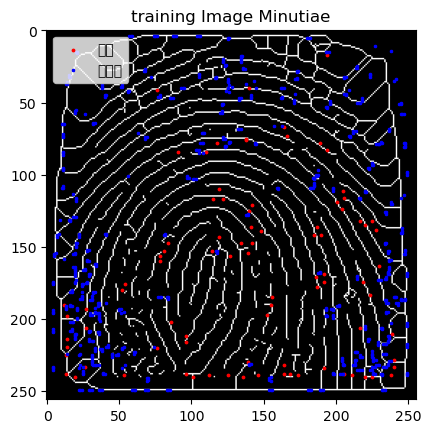

Processing test images...


Extracting minutiae from test images: 100%|██████████████████████████████████████| 1428/1428 [00:00<00:00, 2531.27it/s]


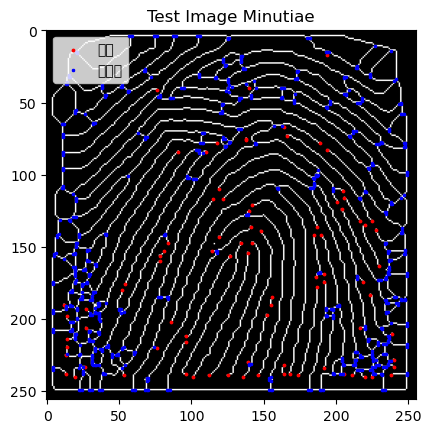

Execution time: 2.4920034408569336 seconds


In [231]:
@jit(nopython=True)
def minutiae_extraction(skeleton):
    skeleton = (skeleton == 255).astype(np.uint8) 
    minutiae_end = [] # 끝점
    minutiae_bif = [] # 분기점
    
    # 3x3 윈도우 사용하여 특징 추출
    rows, cols = skeleton.shape
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            if skeleton[i, j] == 1:  # center pixel ==1        
                # 3x3 window
                window = skeleton[i-1:i+2, j-1:j+2]
                # 중심 픽셀 제외한 합 
                count = np.sum(window) - 1
                
                # 끝점: 1개의 이웃
                if count == 1:
                    minutiae_end.append((i, j))
                # 분기점: 3개의 이웃
                elif count == 3:
                    minutiae_bif.append((i, j))

 
    return minutiae_end, minutiae_bif

# 실행 시간 분석을 위해 시작 시간 기록
start_time = time.time()

# 모든 이미지에 대해 특징 추출
train_minutiae_end = []
train_minutiae_bif = []
test_minutiae_end = []
test_minutiae_bif = []

# 학습 이미지에 대해 특징 추출
print("Processing train images...")
for _, _, skeleton_image, minutiae_end, minutiae_bif in tqdm(processed_train_images, desc="Extracting minutiae from train images"):
    minutiae_end, minutiae_bif = minutiae_extraction(skeleton_image)
    train_minutiae_end.append(minutiae_end)
    train_minutiae_bif.append(minutiae_bif)

plt.imshow(skeleton_image_train, cmap='gray')
plt.scatter([x[1] for x in minutiae_end_test], [x[0] for x in minutiae_end_test], c='r', marker='o', label='끝점', s=3)
plt.scatter([x[1] for x in minutiae_bif_test], [x[0] for x in minutiae_bif_test], c='b', marker='x', label='분기점', s=3)
plt.legend()
plt.title('training Image Minutiae')
plt.show()

# 테스트 이미지에 대해 특징 추출
print("Processing test images...")
for _, _, skeleton_image, minutiae_end, minutiae_bif in tqdm(processed_test_images, desc="Extracting minutiae from test images"):
    minutiae_end, minutiae_bif = minutiae_extraction(skeleton_image)
    test_minutiae_end.append(minutiae_end)
    test_minutiae_bif.append(minutiae_bif)

plt.imshow(skeleton_image_test, cmap='gray')
plt.scatter([x[1] for x in minutiae_end_test], [x[0] for x in minutiae_end_test], c='r', marker='o', label='끝점', s=3)
plt.scatter([x[1] for x in minutiae_bif_test], [x[0] for x in minutiae_bif_test], c='b', marker='x', label='분기점', s=3)
plt.legend()
plt.title('Test Image Minutiae')
plt.show()
# 실행 시간 출력
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [207]:
def list_to_np(image_path):
    binary_image = np.random.randint(0, 2, (100, 100), dtype=np.uint8)
    skeleton_image = np.random.randint(0, 2, (100, 100), dtype=np.uint8)
    minutiae_end = np.random.randint(0, 100, (10, 2)).tolist()
    minutiae_bif = np.random.randint(0, 100, (10, 2)).tolist()
    return (image_path, binary_image, skeleton_image, minutiae_end, minutiae_bif)


# np array로 변환
train_minutiae_array = [(np.array(train[3]), np.array(train[4])) for train in processed_train_images]
test_minutiae_array = [(np.array(test[3]), np.array(test[4])) for test in processed_test_images]

In [232]:
from concurrent.futures import ThreadPoolExecutor
from os.path import basename
from numba import jit

# minuatie 함수
@jit(nopython=True)
def match_minutiae(test_points, train_points):
    if test_points.size == 0 or train_points.size == 0:
        return np.inf

    # 유클리디안 거리 계산 (벡터화)
    num_test_points = test_points.shape[0]
    num_train_points = train_points.shape[0]
    total_distance = 0.0

    for i in range(num_test_points):
        min_distance = np.inf
        for j in range(num_train_points):
            dist = np.sqrt((test_points[i, 0] - train_points[j, 0]) ** 2 + (test_points[i, 1] - train_points[j, 1]) ** 2)
            if dist < min_distance:
                min_distance = dist
        total_distance += min_distance

    return total_distance


results = []
def perform_matching_and_store_results(train_minutiae_array, test_minutiae_array, list_train, list_test):
    start_time = time.time()    

    for j, (test_end, test_bif) in enumerate(tqdm(test_minutiae_array, desc="Matching test images")):
        test_image_name = basename(list_test[j])

        best_distance = np.inf
        best_train_image = None

        for i, (train_end, train_bif) in enumerate(train_minutiae_array):
            train_image_name = basename(list_train[i])  # train 이미지의 파일 이름 추출

            end_distance = match_minutiae(train_end, test_end)
            bif_distance = match_minutiae(train_bif, test_bif)
            total_distance = end_distance + bif_distance

            if total_distance < best_distance:
                best_distance = total_distance
                best_train_image = train_image_name

        if best_train_image is not None:
            results.append({
                'test_image': test_image_name,
                "train_image": best_train_image,
                "distance": best_distance
            })

    end_time = time.time()
    total_time = end_time - start_time
    print(f"Total execution time: {total_time:.2f} seconds")
    
    # 매칭 결과 출력
    for result in results:
        print(f"Best match for {result['test_image']}: {result['train_image']} - Distance: {result['distance']}")

perform_matching_and_store_results(train_minutiae_array, test_minutiae_array, list_train, list_test)

Matching test images: 100%|████████████████████████████████████████████████████████| 1428/1428 [13:44<00:00,  1.73it/s]

Total execution time: 824.10 seconds
Best match for 100_type1.BMP: 100.BMP - Distance: 60.94424681121299
Best match for 100_type2.BMP: 100.BMP - Distance: 303.44500138236765
Best match for 100_type3.BMP: 100.BMP - Distance: 5.82842712474619
Best match for 101_type1.BMP: 101.BMP - Distance: 333.1489159566102
Best match for 101_type2.BMP: 101.BMP - Distance: 256.59618935830736
Best match for 101_type3.BMP: 101.BMP - Distance: 66.41003570201654
Best match for 102_type1.BMP: 102.BMP - Distance: 365.38928687048144
Best match for 102_type2.BMP: 102.BMP - Distance: 614.4806497445711
Best match for 102_type3.BMP: 102.BMP - Distance: 98.21332072788017
Best match for 104_type1.BMP: 104.BMP - Distance: 509.69766306264205
Best match for 104_type2.BMP: 104.BMP - Distance: 557.0917200930829
Best match for 104_type3.BMP: 104.BMP - Distance: 198.89663702421723
Best match for 105_type1.BMP: 105.BMP - Distance: 378.4843020435609
Best match for 105_type2.BMP: 105.BMP - Distance: 247.1761652883287
Best ma

In [324]:
def calculate_metrics(results, threshold):
    tp = fp = fn = tn = 0
    for result in results:
        distance = result['distance']
        if distance <= threshold:
            tp += 1
        else:
            fn += 1
        
    fp = len(results) - tp
    tn = len(results) - fn

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    FAR = fp / (fp + tn) if (fp + tn) > 0 else 0
    FRR = fn / (tp + fn) if (tp + fn) > 0 else 0
    ACC = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0

    return precision, recall, FAR, FRR, ACC


FAR = FRR = ACC = 0
tp = fp = fn = tn =0
p = th = best_accuracy= 0
thresholds = np.arange(500, 1500, 10)
best_threshold = 0
best_accuracy = 0
p = 0

thresholds = np.arange(500, 2000, 10)

for th in thresholds:
    precision, recall, FAR, FRR, ACC = calculate_metrics(results, th)

    
    if ACC > best_accuracy:
        best_accuracy = ACC
        best_threshold = th
    elif ACC == best_accuracy:
        pass

print(f"Best threshold: {best_threshold}")
print(f"Best accuracy: {best_accuracy}")

Best threshold: 1820
Best accuracy: 0.9992997198879552
